In [ ]:
!pip install pymare

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pymare
from pymare.estimators import DerSimonianLaird as DSL

In [ ]:
file_path = "/content/drive/MyDrive/Biocad_test/task_2.xlsx"

In [ ]:
df = pd.read_excel(file_path, sheet_name='data')
df

,author,epi_formula,Q_ua_border,nQ,UA_mean,n,fgr_mean,fgr_sd,generated
0,"Zhou, F., 2019",1,";4,63",1,3.940000,2674,105.66,13.950000,0
1,"Zhou, F., 2019",1,"4,63;5,60",2,5.120000,2666,101.15,13.730000,0
2,"Zhou, F., 2019",1,"5,60;6,71",3,6.140000,2668,98.21,14.020000,0
3,"Zhou, F., 2019",1,"6,71;",4,7.850000,2669,96.22,15.000000,0
4,"Takae, K., 2016",0,";4,0",1,3.360000,554,83.00,7.061161,1
5,"Takae, K., 2016",0,"4,1;4,9",2,4.550000,515,82.00,6.808083,1
6,"Takae, K., 2016",0,"5,0;5,8",3,5.430000,483,80.00,6.593178,1
7,"Takae, K., 2016",0,"5,9;",4,7.490000,507,79.00,6.754998,1
8,"Ryoo, J. H., 2013",1,";5,09",1,3.910000,3756,83.50,9.800000,1
9,"Ryoo, J. H., 2013",1,"5,1;5,69",2,5.400000,3756,82.60,9.400000,1


<Figure size 1200x600 with 0 Axes>

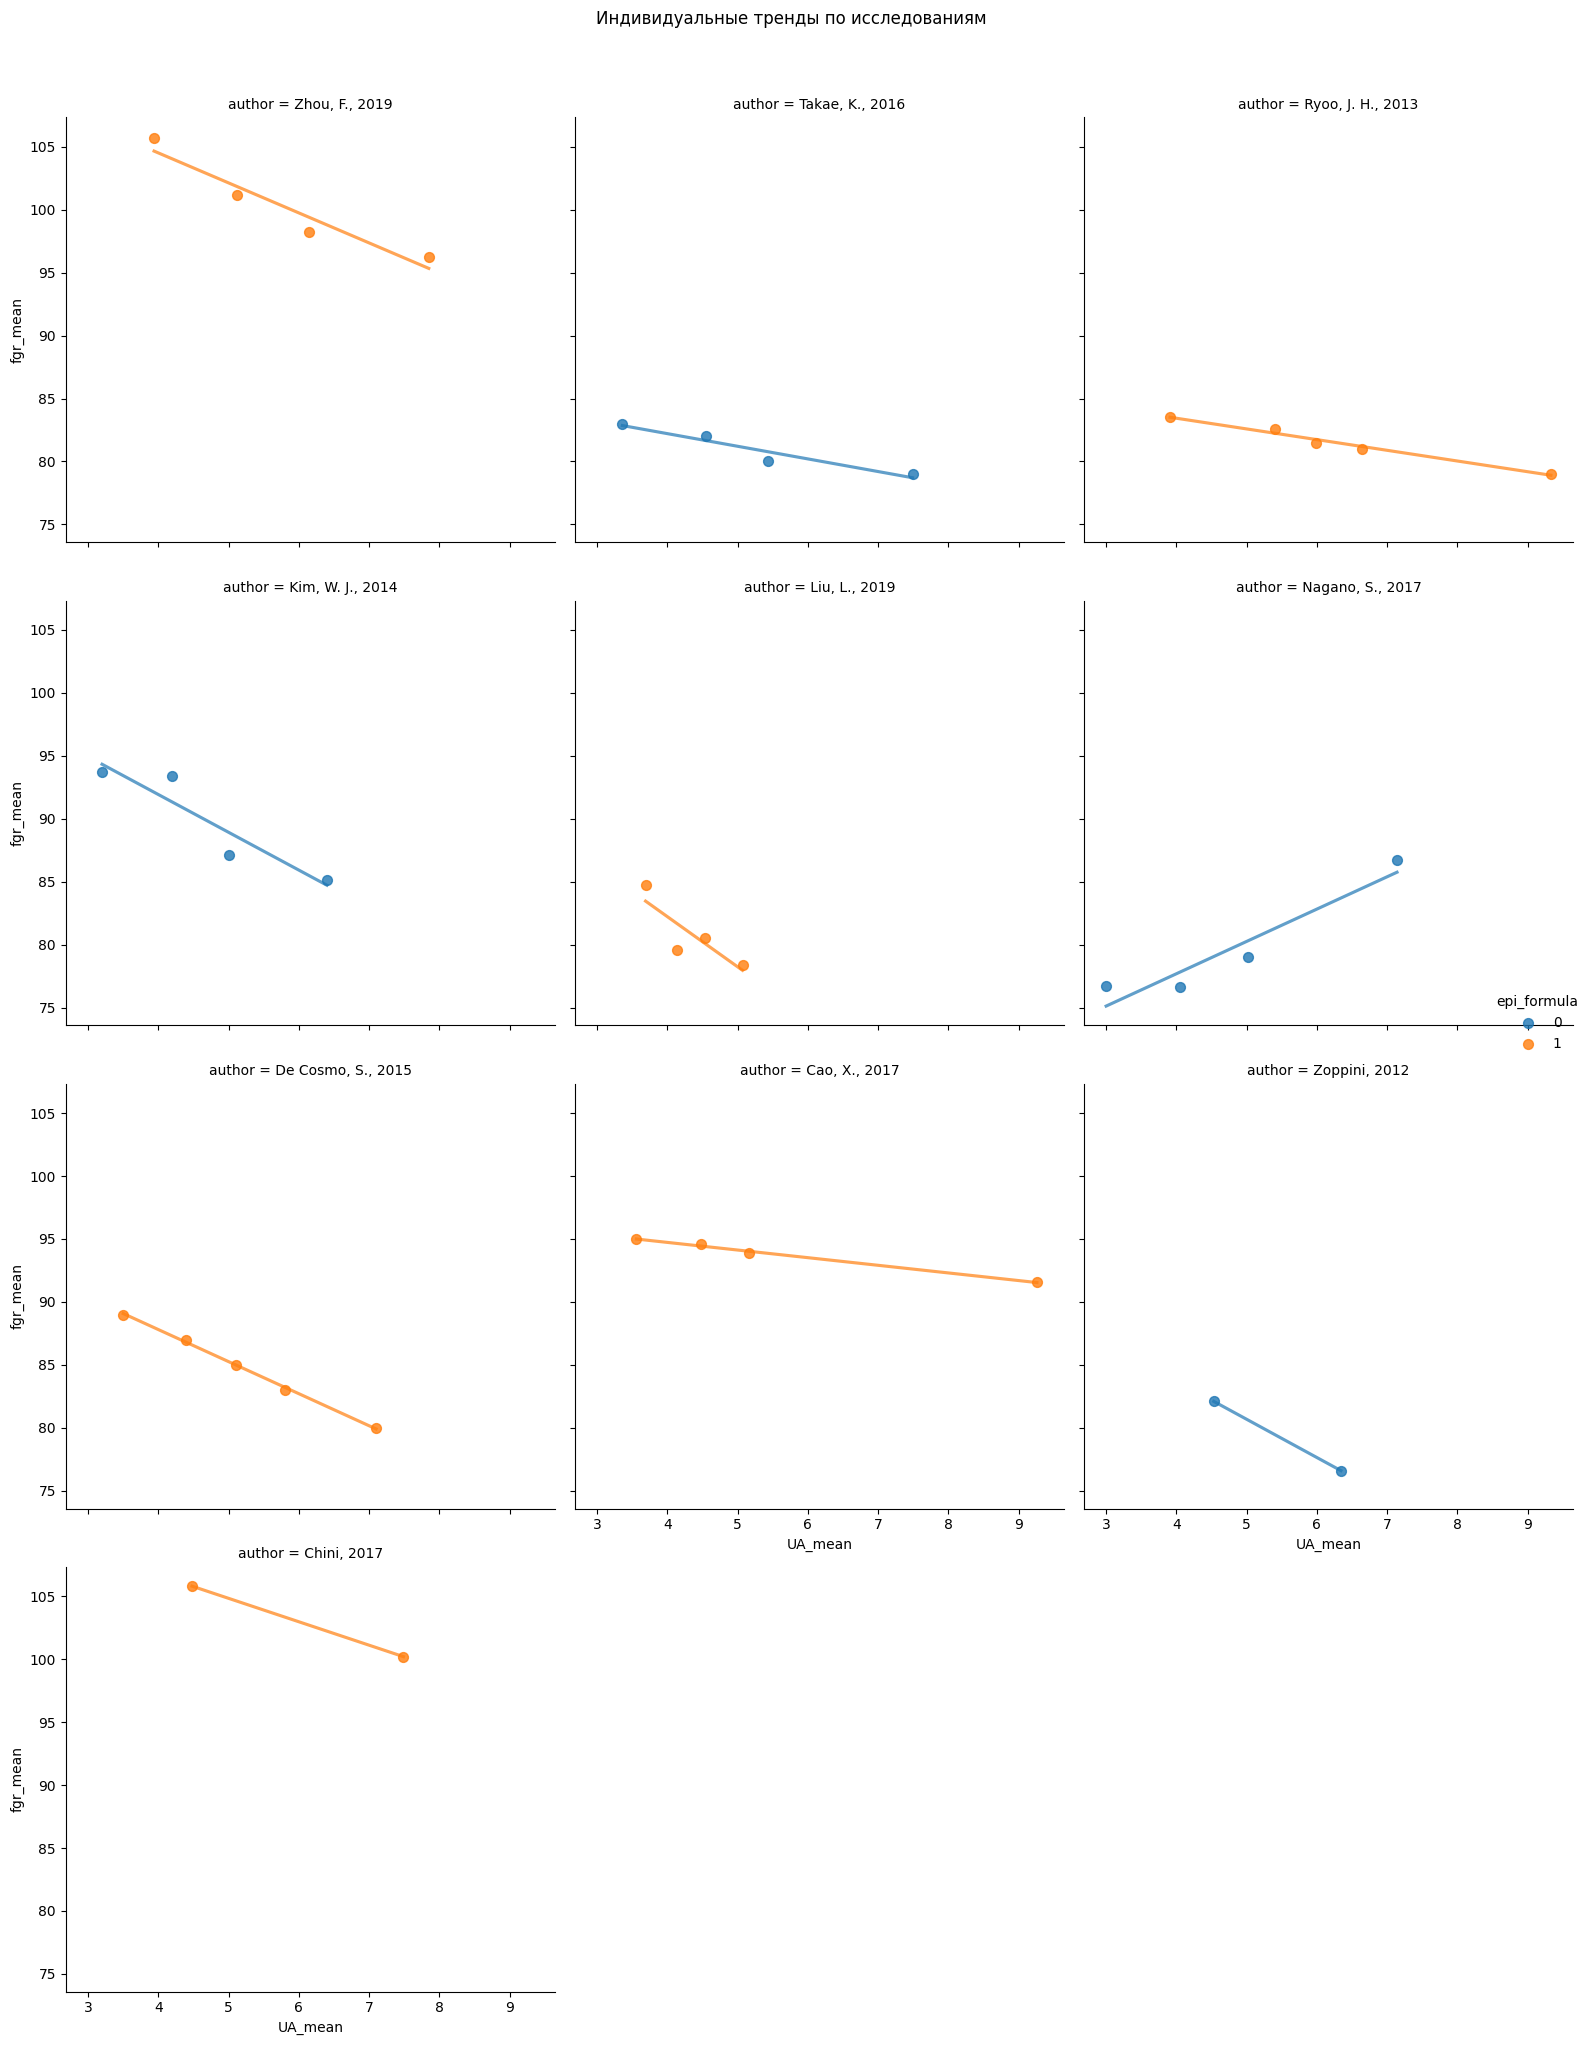

In [ ]:
plt.figure(figsize=(12, 6))

sns.lmplot(
    data=df,
    x='UA_mean',
    y='fgr_mean',
    col='author',
    col_wrap=3,
    hue='epi_formula',
    ci=None,
    line_kws={'alpha': 0.7},
    scatter_kws={'s': 50}
)

plt.suptitle('Индивидуальные тренды по исследованиям', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# Предварительный расчёт эффектов (разница между минимальным и максимальным значением МК)
def calculate_effects(df):
    effects = []
    for author, group in df.groupby('author'):
        if len(group) >= 2:
            delta = group['fgr_mean'].iloc[0] - group['fgr_mean'].iloc[-1]
            se = np.sqrt((group['fgr_sd'].iloc[0]**2 / group['n'].iloc[0]) +
                        (group['fgr_sd'].iloc[-1]**2 / group['n'].iloc[-1]))
            effects.append({
                'author': author,
                'delta': delta,
                'se': se,
                'nQ': group['nQ'].max(),
                'epi_formula': group['epi_formula'].max(),
                'generated': group['generated'].max(),
                'has_borders': group['Q_ua_border'].notna().all()
            })
    return pd.DataFrame(effects)

effects_df = calculate_effects(df)


In [ ]:
effects_df

,author,delta,se,nQ,epi_formula,generated,has_borders
0,"Cao, X., 2017",3.41,0.633960,4,1,1,True
1,"Chini, 2017",5.60,2.129272,2,1,0,False
2,"De Cosmo, S., 2015",9.00,0.350393,5,1,0,False
3,"Kim, W. J., 2014",8.60,2.056936,4,0,0,True
4,"Liu, L., 2019",6.30,1.222271,4,1,1,True
5,"Nagano, S., 2017",-10.00,3.129697,4,0,1,True
6,"Ryoo, J. H., 2013",4.50,0.216006,5,1,1,True
7,"Takae, K., 2016",4.00,0.424264,4,0,1,True
8,"Zhou, F., 2019",9.44,0.396329,4,1,0,True
9,"Zoppini, 2012",5.50,1.102194,2,0,0,True


In [ ]:
dataset = pymare.Dataset(y=effects_df['delta'], v=effects_df['se']**2, X=None)
model = DSL()
results = model.fit_dataset(dataset)

In [ ]:
heterogeneity = results.summary().get_heterogeneity_stats()
heterogeneity

{'Q': array([263.33432987]),
 'p(Q)': array([1.51989433e-51]),
 'I^2': array([96.58229141]),
 'H': array([5.4091931])}

In [ ]:
tau2 = results.summary().get_re_stats()['tau^2']
tau2

array([7.72856039])

In [ ]:
fe_stats = results.summary().get_fe_stats()
fe_stats

{'est': array([[5.35081581]]),
 'se': array([[0.96461609]]),
 'ci_l': array([[3.46020302]]),
 'ci_u': array([[7.24142859]]),
 'z': array([[5.54709369]]),
 'p': array([[2.90457118e-08]])}

In [ ]:
meta_results = {
    'n_studies': len(effects_df),
    'tau^2': tau2[0],
    **{k: v[0] for k,v in heterogeneity.items()},
    **{k: v[0][0] for k, v in fe_stats.items()}
    }

In [ ]:
meta_results

{'n_studies': 10,
 'tau^2': np.float64(7.728560386171497),
 'Q': np.float64(263.33432987206646),
 'p(Q)': np.float64(1.519894327189333e-51),
 'I^2': np.float64(96.5822914147303),
 'H': np.float64(5.409193099324996),
 'est': np.float64(5.3508158062426885),
 'se': np.float64(0.9646160863234756),
 'ci_l': np.float64(3.4602030181406964),
 'ci_u': np.float64(7.241428594344681),
 'z': np.float64(5.547093690544508),
 'p': np.float64(2.904571183570681e-08)}

In [ ]:
keys = meta_results.keys()
values = []
for key in keys:
    if key not in ['p', 'p(Q)']:
      if isinstance(meta_results[key], np.float64):
        values.append(meta_results[key].item())
      else:
        values.append(meta_results[key])
    else:
      values.append(f"{meta_results[key]:.3f}")

In [ ]:
meta_results_df = pd.DataFrame({
    'Параметр': [
        'Число исследований',
        'Межгрупповая дисперсия (τ²)',
        'Q-статистика',
        'p-value (Q)',
        'Гетерогенность (I², %)',
        'Индекс разнообразия (H)',
        'Общий эффект',
        'Стандартная ошибка',
        '95% ДИ (нижняя граница)',
        '95% ДИ (верхняя граница)',
        'Z-статистика',
        'p-value'
    ],
    'Значение': values
})

meta_results_df['Значение'] = meta_results_df['Значение'].apply(lambda x: f"{x:.3f}" if isinstance(x, float) else x)
meta_results_df


,Параметр,Значение
0,Число исследований,10
1,Межгрупповая дисперсия (τ²),7.729
2,Q-статистика,263.334
3,p-value (Q),0.000
4,"Гетерогенность (I², %)",96.582
5,Индекс разнообразия (H),5.409
6,Общий эффект,5.351
7,Стандартная ошибка,0.965
8,95% ДИ (нижняя граница),3.460
9,95% ДИ (верхняя граница),7.241


In [ ]:
effects_df = effects_df.assign(
    weight = 1/(effects_df['se']**2 + meta_results['tau^2']),
    weight_percent = lambda x: 100*x['weight']/x['weight'].sum()
)

In [ ]:
effects_df

,author,delta,se,nQ,epi_formula,generated,has_borders,weight,weight_percent
0,"Cao, X., 2017",3.41,0.633960,4,1,1,True,0.122994,11.444415
1,"Chini, 2017",5.60,2.129272,2,1,0,False,0.081550,7.588134
2,"De Cosmo, S., 2015",9.00,0.350393,5,1,0,False,0.127367,11.851286
3,"Kim, W. J., 2014",8.60,2.056936,4,0,0,True,0.083615,7.780263
4,"Liu, L., 2019",6.30,1.222271,4,1,1,True,0.108430,10.089275
5,"Nagano, S., 2017",-10.00,3.129697,4,0,1,True,0.057066,5.309903
6,"Ryoo, J. H., 2013",4.50,0.216006,5,1,1,True,0.128614,11.967305
7,"Takae, K., 2016",4.00,0.424264,4,0,1,True,0.126445,11.765532
8,"Zhou, F., 2019",9.44,0.396329,4,1,0,True,0.126813,11.799733
9,"Zoppini, 2012",5.50,1.102194,2,0,0,True,0.111814,10.404154


In [ ]:
# Анализ подгрупп
subgroups = {
    'nQ': {
        2: effects_df['nQ'] == 2,
        4: effects_df['nQ'] == 4,
        5: effects_df['nQ'] == 5
    },
    'epi_formula': {
        0: effects_df['epi_formula'] == 0,
        1: effects_df['epi_formula'] == 1
    },
    'generated': {
        0: effects_df['generated'] == 0,
        1: effects_df['generated'] == 1
    },
    'has_borders': {
        True: effects_df['has_borders'] == True,
        False: effects_df['has_borders'] == False
    }
}


In [ ]:
subgroup_results = {}
for name, group in subgroups.items():
    for key, mask in group.items():
        subgroup_data = effects_df[mask]
        if len(subgroup_data) >= 2:
            effects_sub = subgroup_data['delta'].values
            variances_sub = subgroup_data['se'].values ** 2
            dataset_sub = pymare.Dataset(y=effects_sub, v=variances_sub, X=None)
            meta_sub = DSL().fit_dataset(dataset_sub)
            subgroup_results[f'{name}_{key}'] = {
                'n_studies': len(subgroup_data),
                'est': f"{meta_sub.summary().get_fe_stats()['est'][0][0]:.3f}",
                'ci_l': f"{meta_sub.summary().get_fe_stats()['ci_l'][0][0]:.3f}",
                'ci_u': f"{meta_sub.summary().get_fe_stats()['ci_u'][0][0]:.3f}",
                'I2': f"{meta_sub.summary().get_heterogeneity_stats()['I^2'][0]:.3f}",
                'tau2': f"{meta_sub.summary().get_re_stats()['tau^2'][0]:.3f}",
                'p': meta_sub.summary().get_fe_stats()['p'][0][0]
            }

In [ ]:
sub_results_df = pd.DataFrame.from_dict(subgroup_results).transpose()
print("Результаты анализа подгрупп:")
sub_results_df

Результаты анализа подгрупп:


,n_studies,est,ci_l,ci_u,I2,tau2,p
nQ_2,2,5.521,3.603,7.440,0.000,0.000,0.0
nQ_4,6,4.449,1.323,7.575,96.460,13.160,0.005279
nQ_5,2,6.742,2.332,11.151,99.163,10.040,0.002733
epi_formula_0,4,3.085,-0.695,6.864,88.783,11.804,0.109656
epi_formula_1,6,6.437,4.000,8.874,97.642,8.366,0.0
generated_0,5,8.237,6.976,9.499,71.118,1.098,0.0
generated_1,5,3.760,2.382,5.138,85.119,1.655,0.0
has_borders_True,8,4.833,2.830,6.836,95.836,6.888,0.000002
has_borders_False,2,7.949,4.869,11.029,59.718,3.452,0.0


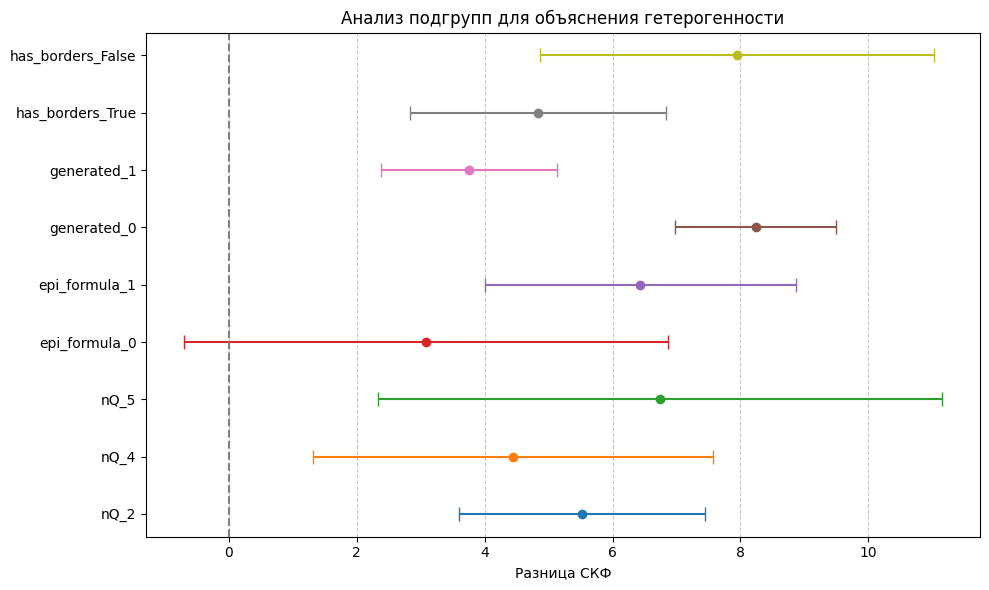

In [ ]:
plt.figure(figsize=(10, 6))
for i, row in sub_results_df.iterrows():
    mean = float(row['est'])
    ci_lower = float(row['ci_l'])
    ci_upper = float(row['ci_u'])
    plt.errorbar(x=mean, y=i, xerr=[[mean - ci_lower], [ci_upper - mean]],
                 fmt='o', capsize=5, label='Подгруппа')
plt.axvline(x=0, color='gray', linestyle='--')
plt.yticks(range(len(sub_results_df)))
plt.xlabel('Разница СКФ')
plt.title('Анализ подгрупп для объяснения гетерогенности')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
exclusion_conditions = {
    "Исследования с неочевидным разделением": effects_df['nQ'] != 4,
    "Исследования без границ": ~effects_df['has_borders'],
    "Трансформированные данные": effects_df['generated'] == 1,
    "Не CKD-EPI формулы": effects_df['epi_formula'] == 0,
    "Наибольший выброс (Nagano)": effects_df['author'].str.contains('Nagano')
}

In [ ]:
# Анализ с исключением подгрупп
exclusion_results = []
for scenario, condition in exclusion_conditions.items():
    included_data = effects_df[~condition]
    if len(included_data) >= 2:
        meta = DSL().fit_dataset(pymare.Dataset(y=included_data['delta'], v=included_data['se']**2, X=None))
        exclusion_results.append(
            {
                'Сценарий исключения': scenario,
                'Осталось исследований': f"{len(included_data)}",
                'est': f"{meta.summary().get_fe_stats()['est'][0][0]:.3f}",
                'ci_l': f"{meta.summary().get_fe_stats()['ci_l'][0][0]:.3f}",
                'ci_u': f"{meta.summary().get_fe_stats()['ci_u'][0][0]:.3f}",
                'I2': f"{meta.summary().get_heterogeneity_stats()['I^2'][0]:.3f}%",
                'tau2': f"{meta.summary().get_re_stats()['tau^2'][0]:.3f}"
            }
        )

# Полный анализ для сравнения
full_meta = DSL().fit_dataset(pymare.Dataset(y=effects_df['delta'], v=effects_df['se']**2))
exclusion_results.insert(0, {
    'Сценарий исключения': "Полный анализ",
    'Осталось исследований': len(effects_df),
    'est': f"{full_meta.summary().get_fe_stats()['est'][0][0]:.3f}",
    'ci_l': f"{full_meta.summary().get_fe_stats()['ci_l'][0][0]:.3f}",
    'ci_u': f"{full_meta.summary().get_fe_stats()['ci_u'][0][0]:.3f}",
    'I2': f"{full_meta.summary().get_heterogeneity_stats()['I^2'][0]:.3f}%",
    'tau2': f"{full_meta.summary().get_re_stats()['tau^2'][0]:.3f}"
})

exclusion_df = pd.DataFrame(exclusion_results)
exclusion_df = exclusion_df.set_index('Сценарий исключения')
print("Результаты анализа с исключением подгрупп:")
exclusion_df

Результаты анализа с исключением подгрупп:


,Осталось исследований,est,ci_l,ci_u,I2,tau2
Сценарий исключения,,,,,,
Полный анализ,10,5.351,3.460,7.241,96.582%,7.729
Исследования с неочевидным разделением,6,4.449,1.323,7.575,96.460%,13.160
Исследования без границ,8,4.833,2.830,6.836,95.836%,6.888
Трансформированные данные,5,8.237,6.976,9.499,71.118%,1.098
Не CKD-EPI формулы,6,6.437,4.000,8.874,97.642%,8.366
Наибольший выброс (Nagano),9,6.209,4.349,8.068,96.631%,7.001


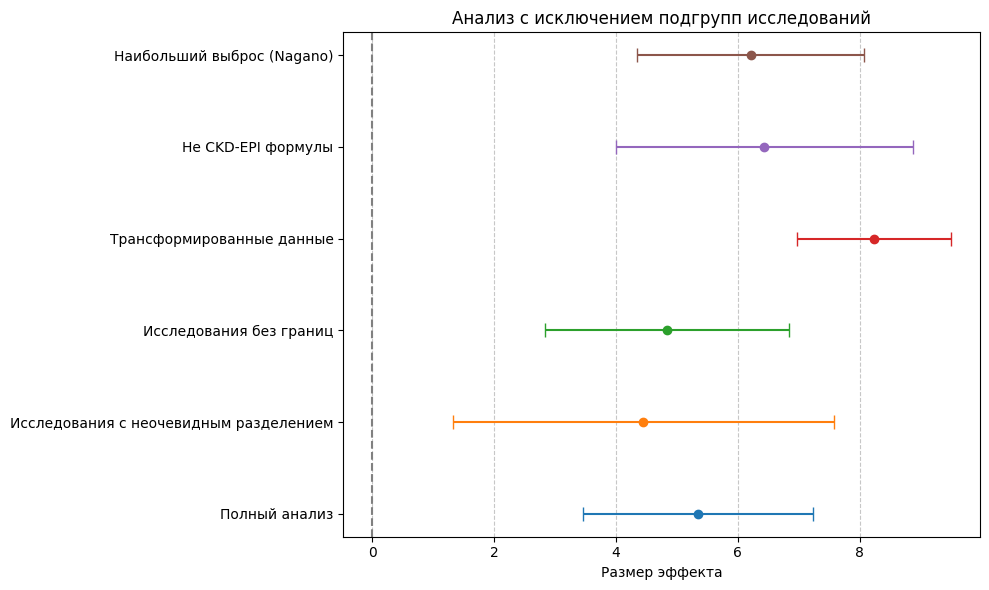

In [ ]:
plt.figure(figsize=(10, 6))
for i, row in exclusion_df.iterrows():
    mean = float(row['est'])
    ci_lower = float(row['ci_l'])
    ci_upper = float(row['ci_u'])
    plt.errorbar(x=mean, y=i, xerr=[[mean - ci_lower], [ci_upper - mean]],
                 fmt='o', capsize=5, label='Сценарий исключения')
plt.axvline(x=0, color='gray', linestyle='--')
plt.yticks(range(len(exclusion_df)))
plt.xlabel('Размер эффекта')
plt.title('Анализ c исключением подгрупп исследований')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Анализ чувствительности с исключением отдельных исследований
sensitivity_results = []
for i in range(len(effects_df)):
    mask = np.ones(len(effects_df), dtype=bool)
    mask[i] = False
    meta_sensitivity = DSL().fit_dataset(pymare.Dataset(y=effects_df['delta'][mask], v=effects_df['se'][mask]**2, X=None))
    sensitivity_results.append(
            {
                'Исключено': effects_df['author'][i],
                'est': f"{meta_sensitivity.summary().get_fe_stats()['est'][0][0]:.3f}",
                'ci_l': f"{meta_sensitivity.summary().get_fe_stats()['ci_l'][0][0]:.3f}",
                'ci_u': f"{meta_sensitivity.summary().get_fe_stats()['ci_u'][0][0]:.3f}",
                'I2': f"{meta_sensitivity.summary().get_heterogeneity_stats()['I^2'][0]:.3f}%",
                'tau2': f"{meta_sensitivity.summary().get_re_stats()['tau^2'][0]:.3f}"
            }
        )

sensitivity_df = pd.DataFrame(sensitivity_results)
sensitivity_df = sensitivity_df.set_index('Исключено')
print("Результаты анализа чувствительности:")
sensitivity_df

Результаты анализа чувствительности:


,est,ci_l,ci_u,I2,tau2
Исключено,,,,,
"Cao, X., 2017",5.587,3.545,7.628,96.762%,8.019
"Chini, 2017",5.326,3.348,7.303,96.962%,7.826
"De Cosmo, S., 2015",4.903,3.001,6.805,95.242%,6.759
"Kim, W. J., 2014",5.074,3.100,7.048,96.942%,7.778
"Liu, L., 2019",5.233,3.213,7.253,96.961%,7.962
"Nagano, S., 2017",6.209,4.349,8.068,96.631%,7.001
"Ryoo, J. H., 2013",5.386,3.187,7.584,95.674%,9.459
"Takae, K., 2016",5.476,3.344,7.609,96.675%,8.838
"Zhou, F., 2019",4.864,3.007,6.720,95.312%,6.390
